In [47]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
sns.set()
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap

In [2]:
# Loading dataset
df = pd.read_csv(r"C:\Users\neetac1973\Downloads\wine (1).csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.head() #Return the first n rows

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#Renaming the columns based on their features.

columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'dilution_of_wines', 'proline']

In [5]:
columns

['class',
 'alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'dilution_of_wines',
 'proline']

In [6]:
##EDA & Data Preprocessing
df.info() #gives information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# Checking for null values
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
# find unique values
df.nunique(axis=1)

0      14
1      14
2      14
3      14
4      14
       ..
173    14
174    14
175    14
176    14
177    14
Length: 178, dtype: int64

In [11]:
df.value_counts(subset=None) #Return a Series containing counts of unique rows in the DataFrame

Type  Alcohol  Malic  Ash   Alcalinity  Magnesium  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  Color  Hue   Dilution  Proline
1     12.85    1.60   2.52  17.8        95         2.48     2.37        0.26           1.46             3.93   1.09  3.63      1015       1
3     12.36    3.83   2.38  21.0        88         2.30     0.92        0.50           1.04             7.65   0.56  1.58      520        1
2     12.60    1.34   1.90  18.5        88         1.45     1.36        0.29           1.35             2.45   1.04  2.77      562        1
      12.64    1.36   2.02  16.8        100        2.02     1.41        0.53           0.62             5.75   0.98  1.59      450        1
      12.67    0.98   2.24  18.0        99         2.20     1.94        0.30           1.46             2.62   1.23  3.16      450        1
                                                                                                                                         ..
      11.45    2.40   2.4

In [19]:
# Using the standard scaler method to get the values converted into integers.
X = df.iloc[:, 1:].values
from sklearn.preprocessing import StandardScaler
X_normal = scale(X)

In [20]:
X_normal.shape

(178, 13)

In [21]:
X_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [22]:
##Building PCA
# Using PCA to reduce the dimensionality of data in order to optimize the result of the clustering
pca = PCA()
principalComponents = pca.fit_transform(X_normal)
principalComponents

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [23]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset = pd.DataFrame(data = principalComponents, columns = ['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'] )
PCA_dataset

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [24]:
PCA_dataset.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [25]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [26]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [27]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

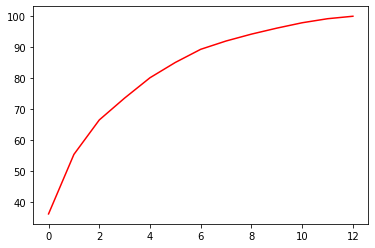

In [28]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

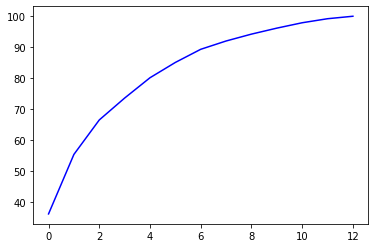

In [29]:
 plt.plot(var1,color="blue")

As our problem is suggesting to use first 3 principal components for further computation, Extracting the three features from PCA_dataset

In [30]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']

In [31]:
# Creating dataframe for further clusering algorithms
pca_df = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_df

,component1,component2,component3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [32]:
pca_df.head()

,component1,component2,component3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


C:\Users\neetac1973\AppData\Local\Temp\ipykernel_17800\3368922698.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


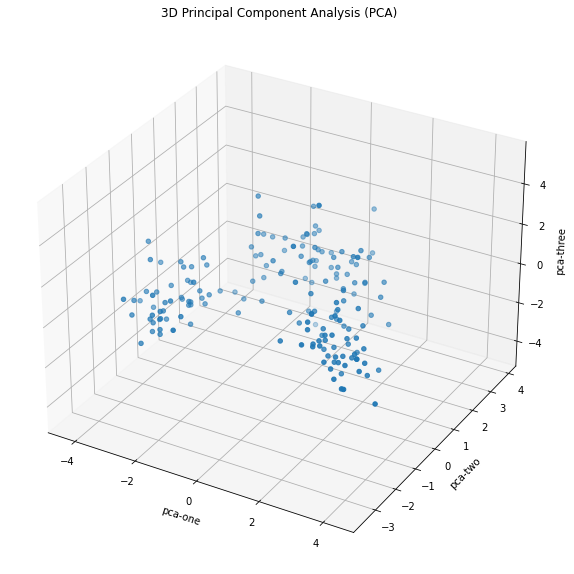

In [33]:
# Visualizing the results of the 3D PCA.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component1, 
    ys=principal_component2, 
    zs=principal_component3, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


C:\Users\neetac1973\AppData\Local\Temp\ipykernel_17800\2304683275.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


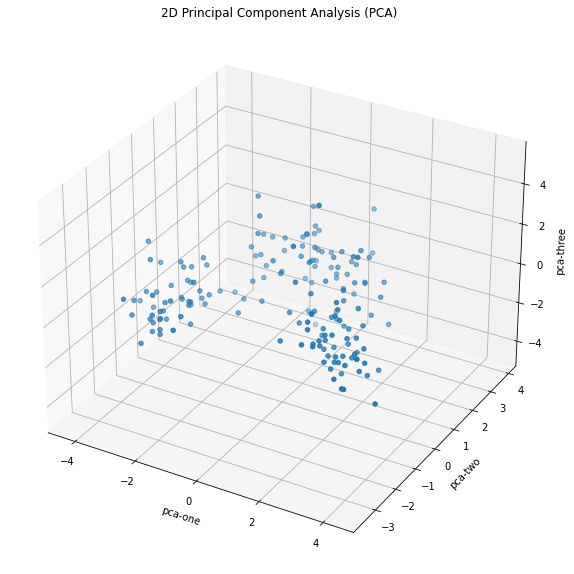

In [35]:
# Visualizing the results of the 3D PCA.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('2D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component1, 
    ys=principal_component2, 
    zs=principal_component3, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


In [36]:
##Performing Heirarchical Agglomerative Clustering
#  Normalizing Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pca_df_normal = scaler.fit_transform(pca_df)
print(pca_df_normal)

[[0.88409355 0.28044707 0.44502757]
 [0.75524083 0.52098937 0.25765258]
 [0.79099786 0.33626383 0.56068773]
 [0.93533214 0.10271162 0.44397497]
 [0.6155344  0.35810263 0.66580576]
 [0.85308182 0.18853559 0.39833717]
 [0.7831255  0.31681056 0.36332375]
 [0.73778236 0.25804241 0.47644818]
 [0.79031526 0.35157211 0.28338035]
 [0.81856406 0.36898588 0.36260348]
 [0.9030599  0.2995525  0.41914796]
 [0.70232687 0.39300963 0.34179568]
 [0.7440692  0.38438229 0.37460304]
 [0.9005487  0.32279689 0.3404465 ]
 [1.         0.19211296 0.33444109]
 [0.76637997 0.25078783 0.48366041]
 [0.75087591 0.16079663 0.54547303]
 [0.71910927 0.25500921 0.54176564]
 [0.91030363 0.13493476 0.4128317 ]
 [0.74070149 0.33220437 0.4451275 ]
 [0.86171036 0.36932981 0.42497329]
 [0.62457173 0.44313012 0.55606991]
 [0.7931488  0.48828916 0.43030582]
 [0.68955378 0.54574762 0.47620682]
 [0.70312085 0.51879034 0.55136962]
 [0.61334326 0.34851312 0.84648431]
 [0.7047153  0.38296507 0.45298678]
 [0.64189357 0.48801387 0.32

In [37]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=3)

In [39]:
y=pd.DataFrame(H_clusters.fit_predict(pca_df_normal),columns=['clustersid_H'])
y['clustersid_H'].value_counts()

0    66
2    65
1    47
Name: clustersid_H, dtype: int64

In [50]:
dataset1 =  df.drop(['Type'], axis=1)
dataset1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


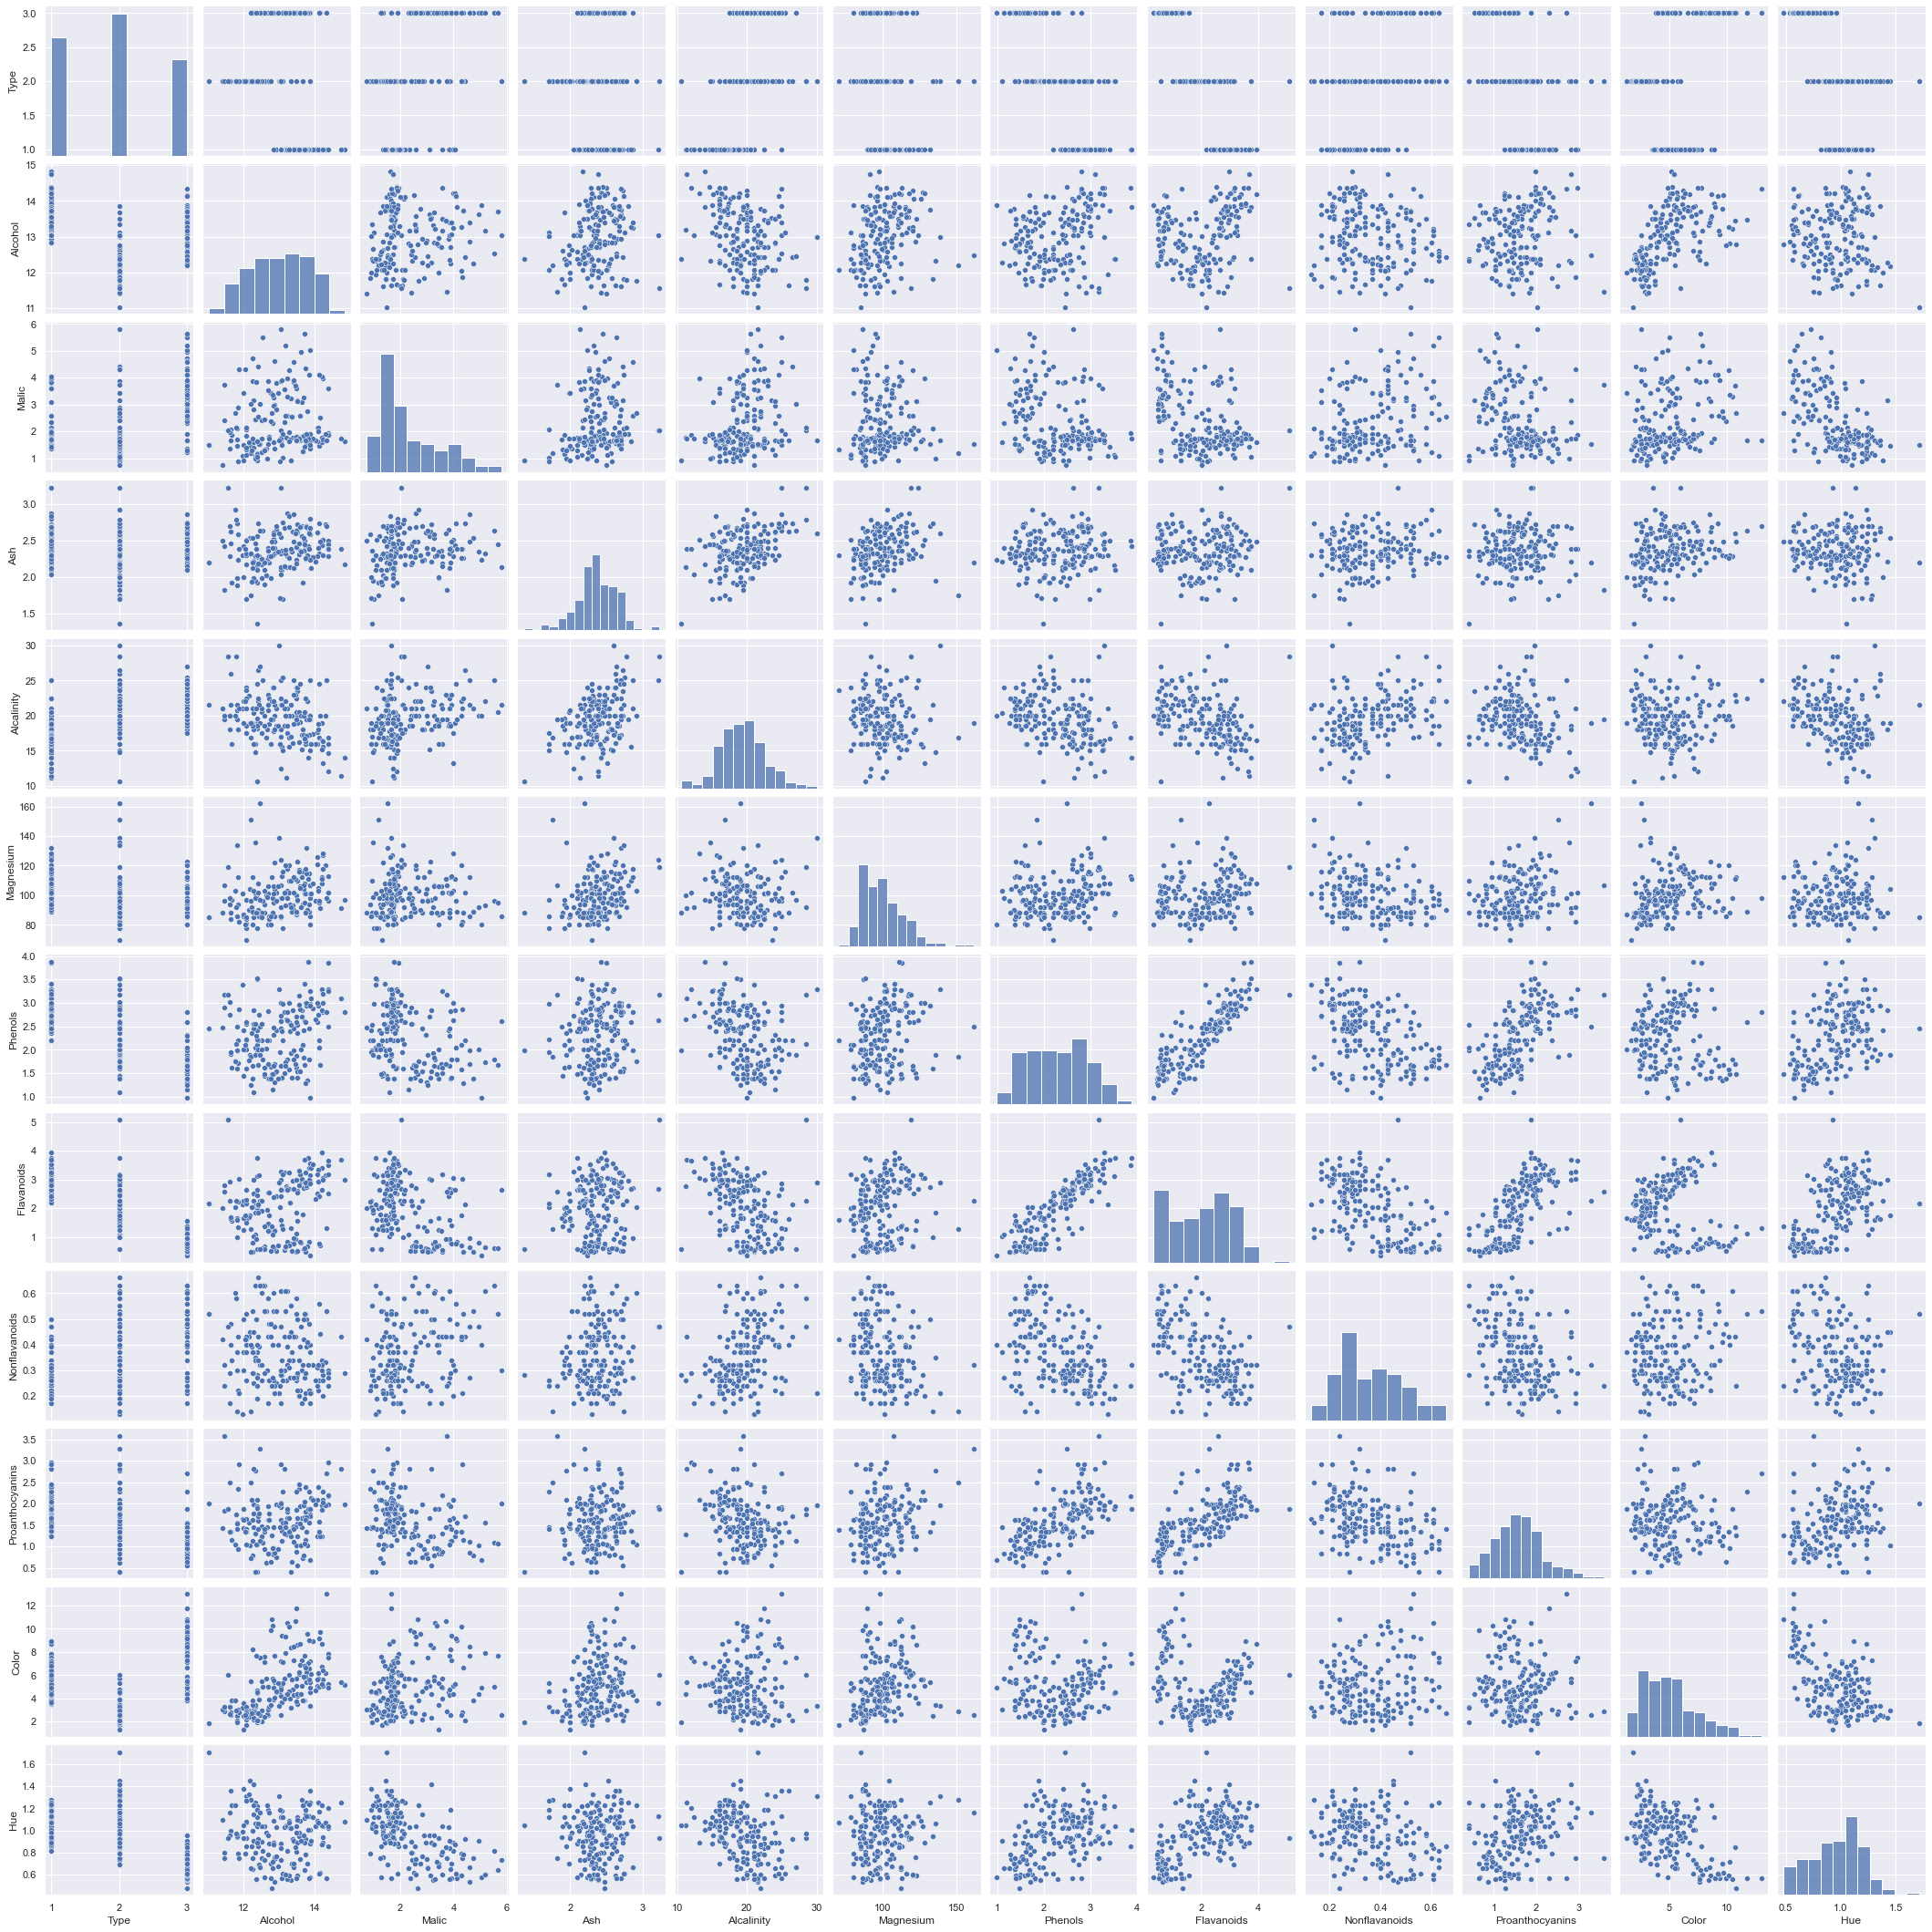

In [53]:
sns.pairplot(df.iloc[:,0:12]) #Plot pairwise relationships in a dataset. 

In [55]:
##Normalizing data for any type of clustering
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(df.iloc[:,1:])
print(df_norm)


      Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    0.842105  0.191700  0.572193    0.257732   0.619565  0.627586   
1    0.571053  0.205534  0.417112    0.030928   0.326087  0.575862   
2    0.560526  0.320158  0.700535    0.412371   0.336957  0.627586   
3    0.878947  0.239130  0.609626    0.319588   0.467391  0.989655   
4    0.581579  0.365613  0.807487    0.536082   0.521739  0.627586   
..        ...       ...       ...         ...        ...       ...   
173  0.705263  0.970356  0.582888    0.510309   0.271739  0.241379   
174  0.623684  0.626482  0.598930    0.639175   0.347826  0.282759   
175  0.589474  0.699605  0.481283    0.484536   0.543478  0.210345   
176  0.563158  0.365613  0.540107    0.484536   0.543478  0.231034   
177  0.815789  0.664032  0.737968    0.716495   0.282609  0.368966   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      0.573840       0.283019         0.593060  0.372014  0.455285  0.970696 

In [56]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(178, 13)

In [57]:
print(std_df)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [58]:
##Running PCA of standardized data.
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=14, n_components=3)
pca_std_df= pca_std.fit_transform(std_df)
print(pca_std_df)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01]
 [ 2.51087430e+00 -9.18070957e-01 -1.77096903e+00]
 [ 2.75362819e+00 -7.89437674e-01 -9.84247490e-01]
 [ 3.47973668e+00 -1.30233324e+00 -4.22735217e-01]
 [ 1.75475290e+00 -6.11977229e-01 -1.19087832e+00]
 [ 2.11346234e+00 -6.75706339e-01 -8.65086426e-01]
 [ 3.45815682e+00 -1.13062988e+00 -1.20427635e+00]
 [ 4.31278391e+00 -2.09597558e+00 -1.26391275e+00]
 [ 2.30518820e+00 -1.66255173e+00  2.17902616e-01]
 [ 2.17195527e+00 -2.32730534e+00  8.31729866e-01]
 [ 1.89897118e+00 -1.63136888e+00  7.94913792e-01]
 [ 3.54198508e+00 -2.51834367e+00 -4.85458508e-01]
 [ 2.08452220e+00 -1.06113799e+

In [59]:
pca_std_df.shape

(178, 3)

In [60]:
# eigenvalues..

print(pca_std.singular_values_)

[28.94203422 21.08225141 16.04371561]


In [61]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[36.1988481  19.20749026 11.12363054]


In [62]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([36.1988481 , 55.40633836, 66.52996889])

Conclusion:

by applying PCA on standardized data with 95% variance it gives 3 PCA components